# Labs5 - PCA
Author: Lionel Fillatre

### Exercise 1

In [1]:
import numpy as np

Data preprocessing

In [2]:
X=np.array([[0, 17],[2 ,19],[3 ,21],[4, 23],[6 ,20]]) # dataset
print(X)

[[ 0 17]
 [ 2 19]
 [ 3 21]
 [ 4 23]
 [ 6 20]]


In [3]:
Xtilde=(X-np.mean(X,0)) # centered dataset
print(Xtilde)

[[-3. -3.]
 [-1. -1.]
 [ 0.  1.]
 [ 1.  3.]
 [ 3.  0.]]


In [4]:
Y=(X-np.mean(X,0))/(np.std(X,0,ddof =1)) # normalized dataset
print(Y)

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.          0.4472136 ]
 [ 0.4472136   1.34164079]
 [ 1.34164079  0.        ]]


In [5]:
SigmaY=1/(Y.shape[0]-1)*(Y.T).dot(Y) # correlation matrix of X
print(SigmaY)

[[1.   0.65]
 [0.65 1.  ]]


PCA by using the SVD

In [6]:
U, sigma, Vt = np.linalg.svd(Y)

In [7]:
# Dimensions of the matrices
U.shape, sigma.shape, Vt.shape

((5, 5), (2,), (2, 2))

In [8]:
# print the two non-zero singular values of Y 
print(sigma) 

[2.56904652 1.18321596]


In [9]:
# print the two non-zero eigenvalues of the PCA
print(sigma**2/(Y.shape[0]-1)) 

[1.65 0.35]


In [10]:
# Compute the full version of the matrice with the singular values
sigmaFull = np.zeros((5, 2), dtype=float)
sigmaFull[:2, :2] = np.diag(sigma)
print(sigmaFull)

[[2.56904652 0.        ]
 [0.         1.18321596]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


In [11]:
# Compute the error between the initial matrix and its SVD
# Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(Y, np.dot(U, np.dot(sigmaFull, Vt)))

True

In [12]:
# First factor axis: this is the first row of Vt
print(Vt[0,:])

[0.70710678 0.70710678]


Plot with Matplotlib the cloud of points and the best normalized PCA line of $X$: do it by yourselves!

### Exercise 2

In [13]:
import pandas
import numpy as np
df = pandas.read_csv('trees.csv')
X = df.values # dataframe convert into matrix
print(X.shape) # just to verify the size of the matrix

(31, 3)


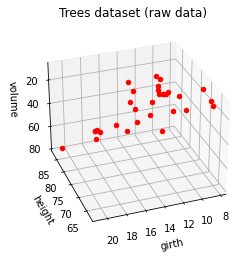

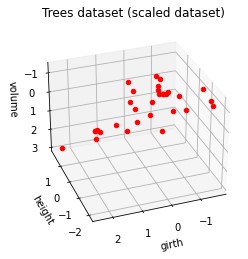

In [14]:
# Magic command for interactive notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing


# To getter a better understanding of interaction of the dimensions
# plot the dataset
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, elev=-150, azim=110)
for  _x, _y, _z in zip( X[:, 0], X[:, 1],  X[:, 2]):
    ax.scatter(_x, _y, _z, c='r')
ax.set_title("Trees dataset (raw data)")
ax.set_xlabel("girth")
ax.set_ylabel("height")
ax.set_zlabel("volume")
plt.show()

# Plot the scaled dataset
X_scaled = preprocessing.scale(X,with_mean=True,with_std=True)
fig2 = plt.figure(2, figsize=(4, 3))
ax2 = Axes3D(fig2, elev=-150, azim=110)
for _x, _y, _z in zip(X_scaled[:, 0], X_scaled[:, 1],  X_scaled[:, 2]):
    ax2.scatter(_x, _y, _z, c='r')
ax2.set_title("Trees dataset (scaled dataset)")
ax2.set_xlabel("girth")
ax2.set_ylabel("height")
ax2.set_zlabel("volume")
plt.show()

[0.80343332 0.18720578 0.0093609 ]


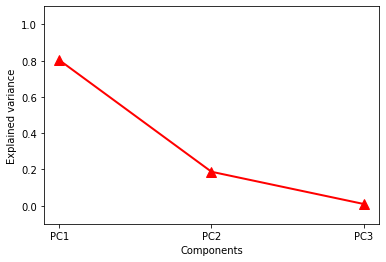

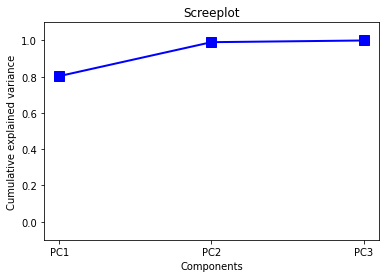

In [15]:
# Screeplot
pca = PCA(n_components=3,copy=True, whiten=True)
pca.fit(X_scaled)
Z = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)

x=np.array([1,2,3])
y=pca.explained_variance_ratio_
plt.figure(3)
plt.plot(x,y,'r^-',linewidth=2.0,markersize=10.0)
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.xlim([0.9, 3.1])
plt.ylim([-0.1, 1.1])
my_xticks = ['PC1','PC2','PC3']
plt.xticks(x, my_xticks)
plt.show()

plt.figure()
plt.plot(x,np.cumsum(y),'bs-',linewidth=2.0,markersize=10.0)
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Screeplot')
plt.xlim([0.9, 3.1]) 
plt.ylim([-0.1, 1.1]) 
plt.xticks(x, my_xticks)
plt.show()


In [16]:
# PCA decomposition with only two components
pca = PCA(n_components=2)
pca.fit(X_scaled)
Z = pca.transform(X_scaled)

Cmp=pca.components_
print(Cmp)
A=Z.dot(Cmp) # Approximated samples on the PCA subspace

[[ 0.60857049  0.48912674  0.62481757]
 [ 0.40990128 -0.8680065   0.28025999]]


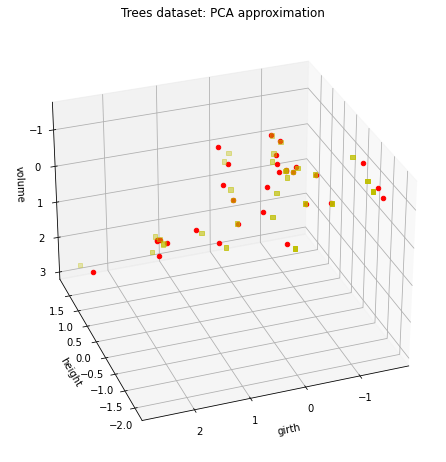

In [17]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig5 = plt.figure(5, figsize=(8, 6))
ax5 = Axes3D(fig5, elev=-150, azim=110)
for _x, _y, _z in zip(X_scaled[:, 0], X_scaled[:, 1],  X_scaled[:, 2]):
    ax5.scatter(_x, _y, _z, c='r')
ax5.scatter(A[:, 0], A[:, 1],  A[:, 2], marker='s', c='y')
ax5.set_title("Trees dataset: PCA approximation")
ax5.set_xlabel("girth")
ax5.set_ylabel("height")
ax5.set_zlabel("volume")
plt.show()
